In [439]:
DATA_PATH = "C:/Users/ltk65/Downloads/scu-ai-competition-202401/"
DATA_PATH

'C:/Users/ltk65/Downloads/scu-ai-competition-202401/'

In [440]:
import pandas as pd
import numpy as np

df = pd.read_csv(f"{DATA_PATH}train.csv") # 학습데이터
df_t = pd.read_csv(f"{DATA_PATH}test.csv") # 테스트 데이터
df.shape

(4223, 18)

In [441]:
df.head(5)

,ID,나이,성별,티록신_복용_여부,항갑상선제_복용_여부,지병_여부,임신_여부,갑상선_수술_이력,I131_치료_여부,갑상선저하_인지_여부,갑상선항진증_인지_여부,리튬_치료_여부,갑상선종_여부,종양_여부,TSH,FreeT3,FreeT4,target
0,train_0,59.0,남,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,NaN,NaN,0.77,0
1,train_1,63.0,남,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,33.0,1.5,NaN,1
2,train_2,65.0,여,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,1.7,2.3,0.95,0
3,train_3,33.0,남,아니오,아니오,예,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,6.2,NaN,0.66,0
4,train_4,64.0,여,예,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,1.2,NaN,0.95,0


In [442]:
df_t.head(5)

,ID,나이,성별,티록신_복용_여부,항갑상선제_복용_여부,지병_여부,임신_여부,갑상선_수술_이력,I131_치료_여부,갑상선저하_인지_여부,갑상선항진증_인지_여부,리튬_치료_여부,갑상선종_여부,종양_여부,TSH,FreeT3,FreeT4
0,test_0,37.0,남,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,NaN,NaN,0.83
1,test_1,55.0,남,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,0.05,1.5,0.72
2,test_2,71.0,여,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,0.10,1.9,0.97
3,test_3,35.0,여,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,0.97,NaN,0.97
4,test_4,16.0,남,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,0.30,NaN,1.06


In [443]:
fill_age = df['나이'].median()
fill_tsh = df["TSH"].median()
fill_free_t3 = df["FreeT3"].median()
fill_free_t4 = df["FreeT4"].median()

In [444]:
df["나이"] = df["나이"].fillna(fill_age)
df["TSH"] = df["TSH"].fillna(fill_tsh)
df["FreeT3"] = df["FreeT3"].fillna(fill_free_t3)
df["FreeT4"] = df["FreeT4"].fillna(fill_free_t4)

In [445]:
df_t["나이"] = df_t["나이"].fillna(fill_age)
df_t["TSH"] = df_t["TSH"].fillna(fill_tsh)
df_t["FreeT3"] = df_t["FreeT3"].fillna(fill_free_t3)
df_t["FreeT4"] = df_t["FreeT4"].fillna(fill_free_t4)

In [446]:
df.isnull().sum()

ID                0
나이                0
성별              137
티록신_복용_여부         0
항갑상선제_복용_여부       0
지병_여부             0
임신_여부             0
갑상선_수술_이력         0
I131_치료_여부        0
갑상선저하_인지_여부       0
갑상선항진증_인지_여부      0
리튬_치료_여부          0
갑상선종_여부           0
종양_여부             0
TSH               0
FreeT3            0
FreeT4            0
target            0
dtype: int64

In [447]:
df_t.isnull().sum()

ID                0
나이                0
성별              117
티록신_복용_여부         0
항갑상선제_복용_여부       0
지병_여부             0
임신_여부             0
갑상선_수술_이력         0
I131_치료_여부        0
갑상선저하_인지_여부       0
갑상선항진증_인지_여부      0
리튬_치료_여부          0
갑상선종_여부           0
종양_여부             0
TSH               0
FreeT3            0
FreeT4            0
dtype: int64

In [448]:
df_age = df.drop(columns=['ID','성별','target'])

In [449]:
df_age_test = df_t.drop(columns=['ID','성별'])

In [450]:
df_age_test.head()

,나이,티록신_복용_여부,항갑상선제_복용_여부,지병_여부,임신_여부,갑상선_수술_이력,I131_치료_여부,갑상선저하_인지_여부,갑상선항진증_인지_여부,리튬_치료_여부,갑상선종_여부,종양_여부,TSH,FreeT3,FreeT4
0,37.0,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,1.40,2.0,0.83
1,55.0,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,0.05,1.5,0.72
2,71.0,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,0.10,1.9,0.97
3,35.0,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,0.97,2.0,0.97
4,16.0,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,0.30,2.0,1.06


In [451]:
from sklearn.preprocessing import OneHotEncoder
cols = df_age.select_dtypes("object").columns.tolist()
enc = OneHotEncoder(handle_unknown = 'ignore')

In [452]:
cols

['티록신_복용_여부',
 '항갑상선제_복용_여부',
 '지병_여부',
 '임신_여부',
 '갑상선_수술_이력',
 'I131_치료_여부',
 '갑상선저하_인지_여부',
 '갑상선항진증_인지_여부',
 '리튬_치료_여부',
 '갑상선종_여부',
 '종양_여부']

In [453]:
tmp = pd.DataFrame(
    enc.fit_transform(df_age[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
age_train_oh = pd.concat([df_age,tmp],axis=1).drop(columns=cols) # 범주형 컬럼 제거
age_train_oh

,나이,TSH,FreeT3,FreeT4,티록신_복용_여부_아니오,티록신_복용_여부_예,항갑상선제_복용_여부_아니오,항갑상선제_복용_여부_예,지병_여부_아니오,지병_여부_예,...,갑상선저하_인지_여부_아니오,갑상선저하_인지_여부_예,갑상선항진증_인지_여부_아니오,갑상선항진증_인지_여부_예,리튬_치료_여부_아니오,리튬_치료_여부_예,갑상선종_여부_아니오,갑상선종_여부_예,종양_여부_아니오,종양_여부_예
0,59.0,1.40,2.0,0.77,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,63.0,33.00,1.5,0.96,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,65.0,1.70,2.3,0.95,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,33.0,6.20,2.0,0.66,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,64.0,1.20,2.0,0.95,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4218,74.0,2.70,1.7,1.11,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4219,38.0,2.00,2.6,0.85,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4220,44.0,0.30,1.5,1.07,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4221,73.0,3.90,1.9,0.80,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [454]:
tmp = pd.DataFrame(
    enc.transform(df_age_test[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
age_test_oh = pd.concat([df_age_test,tmp],axis=1).drop(columns=cols) # 범주형 컬럼 제거
age_test_oh

,나이,TSH,FreeT3,FreeT4,티록신_복용_여부_아니오,티록신_복용_여부_예,항갑상선제_복용_여부_아니오,항갑상선제_복용_여부_예,지병_여부_아니오,지병_여부_예,...,갑상선저하_인지_여부_아니오,갑상선저하_인지_여부_예,갑상선항진증_인지_여부_아니오,갑상선항진증_인지_여부_예,리튬_치료_여부_아니오,리튬_치료_여부_예,갑상선종_여부_아니오,갑상선종_여부_예,종양_여부_아니오,종양_여부_예
0,37.0,1.40,2.0,0.83,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,55.0,0.05,1.5,0.72,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,71.0,0.10,1.9,0.97,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,35.0,0.97,2.0,0.97,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,16.0,0.30,2.0,1.06,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,80.0,0.80,2.3,1.04,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3452,47.0,0.70,2.0,0.76,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3453,65.0,0.02,3.1,0.91,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3454,57.0,1.40,2.0,0.85,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [455]:
# gen 분리된 train
ind = df[df['성별'].notnull()].index
ind_n = df[df['성별'].isnull()].index
gen_x_train = age_train_oh.loc[ind]
gen_x_test = age_train_oh.loc[ind_n]

# gen 분리된 test
t_ind = df_t[df_t['성별'].notnull()].index
t_ind_n = df_t[df_t['성별'].isnull()].index
t_gen_x_train = age_test_oh.loc[t_ind]
t_gen_x_test = age_test_oh.loc[t_ind_n]

In [456]:
gen_x_train.shape, gen_x_test.shape, t_gen_x_train.shape, t_gen_x_test.shape

((4086, 26), (137, 26), (3339, 26), (117, 26))

In [457]:
#target값
gen_y_train = df[df['성별'].notnull()]['성별']
gen_y_test = df[df['성별'].isnull()]['성별']
gen_y_train.shape, gen_y_test.shape

((4086,), (137,))

In [458]:
t_gen_y_train = df_t[df_t['성별'].notnull()]['성별']
t_gen_y_test = df_t[df_t['성별'].isnull()]['성별']
t_gen_y_train.shape, t_gen_y_test.shape

((3339,), (117,))

성별 예측

In [459]:
from sklearn.ensemble import GradientBoostingClassifier

gen_model = GradientBoostingClassifier(random_state=42,loss='exponential')
gen_model.fit(gen_x_train, gen_y_train)

# 성별이 UNK인 데이터를 예측

GradientBoostingClassifier(loss='exponential', random_state=42)

In [460]:
predicted_gender = gen_model.predict(gen_x_test)
predicted_gender

array(['남', '여', '남', '여', '여', '남', '여', '여', '남', '여', '여', '여', '여',
       '여', '여', '여', '여', '여', '여', '여', '여', '여', '여', '남', '남', '여',
       '여', '여', '여', '남', '여', '여', '여', '여', '여', '남', '여', '여', '남',
       '여', '여', '남', '여', '여', '남', '여', '남', '여', '여', '여', '여', '남',
       '여', '여', '여', '여', '여', '여', '남', '여', '남', '여', '여', '여', '여',
       '여', '여', '여', '여', '남', '여', '여', '여', '여', '여', '여', '여', '여',
       '여', '여', '남', '여', '여', '여', '여', '여', '여', '여', '여', '남', '남',
       '여', '여', '여', '여', '여', '남', '여', '여', '여', '남', '남', '남', '여',
       '여', '여', '여', '여', '여', '여', '여', '여', '여', '여', '여', '여', '여',
       '여', '여', '여', '남', '여', '여', '여', '여', '남', '여', '여', '여', '여',
       '여', '여', '여', '여', '여', '여', '여'], dtype=object)

In [461]:
df.loc[df['성별'].isnull(), '성별'] = predicted_gender
df.isnull().sum()

ID              0
나이              0
성별              0
티록신_복용_여부       0
항갑상선제_복용_여부     0
지병_여부           0
임신_여부           0
갑상선_수술_이력       0
I131_치료_여부      0
갑상선저하_인지_여부     0
갑상선항진증_인지_여부    0
리튬_치료_여부        0
갑상선종_여부         0
종양_여부           0
TSH             0
FreeT3          0
FreeT4          0
target          0
dtype: int64

In [462]:
from sklearn.ensemble import GradientBoostingClassifier

t_gen_model = GradientBoostingClassifier(random_state=42,loss='exponential')
t_gen_model.fit(t_gen_x_train, t_gen_y_train)


GradientBoostingClassifier(loss='exponential', random_state=42)

In [463]:
t_predicted_gender = t_gen_model.predict(t_gen_x_test)
t_predicted_gender

array(['여', '여', '여', '여', '여', '남', '여', '여', '여', '여', '남', '여', '여',
       '여', '남', '여', '여', '여', '여', '여', '여', '여', '여', '여', '여', '여',
       '여', '여', '남', '남', '여', '여', '여', '여', '여', '여', '여', '여', '여',
       '여', '여', '여', '여', '여', '여', '여', '여', '여', '여', '여', '여', '여',
       '여', '여', '여', '여', '여', '여', '남', '여', '여', '여', '남', '남', '남',
       '여', '여', '여', '여', '여', '남', '여', '여', '남', '남', '여', '여', '여',
       '여', '남', '여', '여', '여', '여', '여', '여', '여', '여', '여', '남', '여',
       '여', '여', '여', '여', '여', '여', '여', '여', '여', '여', '남', '여', '여',
       '여', '여', '여', '여', '여', '여', '여', '여', '여', '여', '여', '여', '남'],
      dtype=object)

In [464]:
df_t.loc[df_t['성별'].isnull(), '성별'] = t_predicted_gender
df_t.isnull().sum()

ID              0
나이              0
성별              0
티록신_복용_여부       0
항갑상선제_복용_여부     0
지병_여부           0
임신_여부           0
갑상선_수술_이력       0
I131_치료_여부      0
갑상선저하_인지_여부     0
갑상선항진증_인지_여부    0
리튬_치료_여부        0
갑상선종_여부         0
종양_여부           0
TSH             0
FreeT3          0
FreeT4          0
dtype: int64

In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4223 entries, 0 to 4222
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            4223 non-null   object 
 1   나이            4223 non-null   float64
 2   성별            4223 non-null   object 
 3   티록신_복용_여부     4223 non-null   object 
 4   항갑상선제_복용_여부   4223 non-null   object 
 5   지병_여부         4223 non-null   object 
 6   임신_여부         4223 non-null   object 
 7   갑상선_수술_이력     4223 non-null   object 
 8   I131_치료_여부    4223 non-null   object 
 9   갑상선저하_인지_여부   4223 non-null   object 
 10  갑상선항진증_인지_여부  4223 non-null   object 
 11  리튬_치료_여부      4223 non-null   object 
 12  갑상선종_여부       4223 non-null   object 
 13  종양_여부         4223 non-null   object 
 14  TSH           4223 non-null   float64
 15  FreeT3        4223 non-null   float64
 16  FreeT4        4223 non-null   float64
 17  target        4223 non-null   int64  
dtypes: float64(4), int64(1), obj

In [466]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3456 entries, 0 to 3455
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            3456 non-null   object 
 1   나이            3456 non-null   float64
 2   성별            3456 non-null   object 
 3   티록신_복용_여부     3456 non-null   object 
 4   항갑상선제_복용_여부   3456 non-null   object 
 5   지병_여부         3456 non-null   object 
 6   임신_여부         3456 non-null   object 
 7   갑상선_수술_이력     3456 non-null   object 
 8   I131_치료_여부    3456 non-null   object 
 9   갑상선저하_인지_여부   3456 non-null   object 
 10  갑상선항진증_인지_여부  3456 non-null   object 
 11  리튬_치료_여부      3456 non-null   object 
 12  갑상선종_여부       3456 non-null   object 
 13  종양_여부         3456 non-null   object 
 14  TSH           3456 non-null   float64
 15  FreeT3        3456 non-null   float64
 16  FreeT4        3456 non-null   float64
dtypes: float64(4), object(13)
memory usage: 459.1+ KB


In [467]:
# train에 TSH 컬럼 나누기
def categorize_tsh(tsh_value):
    if tsh_value > 4.0:
        return 'High'
    else:
        return 'low'

df['TSH범위'] = df['TSH'].apply(categorize_tsh)

In [468]:
df.head()

,ID,나이,성별,티록신_복용_여부,항갑상선제_복용_여부,지병_여부,임신_여부,갑상선_수술_이력,I131_치료_여부,갑상선저하_인지_여부,갑상선항진증_인지_여부,리튬_치료_여부,갑상선종_여부,종양_여부,TSH,FreeT3,FreeT4,target,TSH범위
0,train_0,59.0,남,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,1.4,2.0,0.77,0,low
1,train_1,63.0,남,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,33.0,1.5,0.96,1,High
2,train_2,65.0,여,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,1.7,2.3,0.95,0,low
3,train_3,33.0,남,아니오,아니오,예,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,6.2,2.0,0.66,0,High
4,train_4,64.0,여,예,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,1.2,2.0,0.95,0,low


In [469]:
# test에 TSH 컬럼 나누기
def categorize_tsh(tsh_value):
    if tsh_value > 4.0:
        return 'High'
    else:
        return 'low'

df_t['TSH범위'] = df_t['TSH'].apply(categorize_tsh)

In [470]:
# train에 갑상선저하인지, 갑상선항진증인지 합쳐서 [정상,갑상선비정상] 으로 나누기
def determine_thyroid_status(row):
    if row['갑상선저하_인지_여부'] == "예":
        return 'hypo'
    elif row['갑상선항진증_인지_여부'] == '예':
        return 'hyper'
    else:
        return 'Normal'

# 새로운 컬럼 추가
df['갑상선_인지'] = df.apply(determine_thyroid_status, axis=1)

In [471]:
# test에 갑상선저하인지, 갑상선항진증인지 합쳐서 [정상,갑상선비정상] 으로 나누기
def determine_thyroid_status(row):
    if row['갑상선저하_인지_여부'] == '예':
        return 'hypo'
    elif row['갑상선항진증_인지_여부'] == '예':
        return 'hyper'
    else:
        return 'Normal'

# 새로운 컬럼 추가
df_t['갑상선_인지'] = df_t.apply(determine_thyroid_status, axis=1)

In [472]:
df['갑상선_인지'].value_counts()

갑상선_인지
Normal    3650
hypo       291
hyper      282
Name: count, dtype: int64

In [473]:
df_t.head()

,ID,나이,성별,티록신_복용_여부,항갑상선제_복용_여부,지병_여부,임신_여부,갑상선_수술_이력,I131_치료_여부,갑상선저하_인지_여부,갑상선항진증_인지_여부,리튬_치료_여부,갑상선종_여부,종양_여부,TSH,FreeT3,FreeT4,TSH범위,갑상선_인지
0,test_0,37.0,남,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,1.40,2.0,0.83,low,Normal
1,test_1,55.0,남,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,0.05,1.5,0.72,low,Normal
2,test_2,71.0,여,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,0.10,1.9,0.97,low,Normal
3,test_3,35.0,여,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,0.97,2.0,0.97,low,Normal
4,test_4,16.0,남,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,아니오,0.30,2.0,1.06,low,Normal


In [474]:
x_train = df.drop(columns=['ID','target'])
y_train = df['target']
x_test = df_t.drop(columns=['ID'])
print(x_train.columns)
print(x_test.columns)

Index(['나이', '성별', '티록신_복용_여부', '항갑상선제_복용_여부', '지병_여부', '임신_여부', '갑상선_수술_이력',
       'I131_치료_여부', '갑상선저하_인지_여부', '갑상선항진증_인지_여부', '리튬_치료_여부', '갑상선종_여부',
       '종양_여부', 'TSH', 'FreeT3', 'FreeT4', 'TSH범위', '갑상선_인지'],
      dtype='object')
Index(['나이', '성별', '티록신_복용_여부', '항갑상선제_복용_여부', '지병_여부', '임신_여부', '갑상선_수술_이력',
       'I131_치료_여부', '갑상선저하_인지_여부', '갑상선항진증_인지_여부', '리튬_치료_여부', '갑상선종_여부',
       '종양_여부', 'TSH', 'FreeT3', 'FreeT4', 'TSH범위', '갑상선_인지'],
      dtype='object')


In [475]:
from sklearn.preprocessing import OneHotEncoder
cols = x_train.select_dtypes("object").columns.tolist()
enc = OneHotEncoder(handle_unknown = 'ignore')
cols

['성별',
 '티록신_복용_여부',
 '항갑상선제_복용_여부',
 '지병_여부',
 '임신_여부',
 '갑상선_수술_이력',
 'I131_치료_여부',
 '갑상선저하_인지_여부',
 '갑상선항진증_인지_여부',
 '리튬_치료_여부',
 '갑상선종_여부',
 '종양_여부',
 'TSH범위',
 '갑상선_인지']

In [476]:
# train OH
tmp = pd.DataFrame(
    enc.fit_transform(x_train[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
x_train = pd.concat([x_train,tmp],axis=1).drop(columns=cols) # 범주형 컬럼 제거
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4223 entries, 0 to 4222
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   나이                4223 non-null   float64
 1   TSH               4223 non-null   float64
 2   FreeT3            4223 non-null   float64
 3   FreeT4            4223 non-null   float64
 4   성별_남              4223 non-null   float64
 5   성별_여              4223 non-null   float64
 6   티록신_복용_여부_아니오     4223 non-null   float64
 7   티록신_복용_여부_예       4223 non-null   float64
 8   항갑상선제_복용_여부_아니오   4223 non-null   float64
 9   항갑상선제_복용_여부_예     4223 non-null   float64
 10  지병_여부_아니오         4223 non-null   float64
 11  지병_여부_예           4223 non-null   float64
 12  임신_여부_아니오         4223 non-null   float64
 13  임신_여부_예           4223 non-null   float64
 14  갑상선_수술_이력_아니오     4223 non-null   float64
 15  갑상선_수술_이력_예       4223 non-null   float64
 16  I131_치료_여부_아니오    4223 non-null   float64


In [477]:
# test OH
tmp = pd.DataFrame(
    enc.fit_transform(x_test[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
x_test = pd.concat([x_test,tmp],axis=1).drop(columns=cols) # 범주형 컬럼 제거
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3456 entries, 0 to 3455
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   나이                3456 non-null   float64
 1   TSH               3456 non-null   float64
 2   FreeT3            3456 non-null   float64
 3   FreeT4            3456 non-null   float64
 4   성별_남              3456 non-null   float64
 5   성별_여              3456 non-null   float64
 6   티록신_복용_여부_아니오     3456 non-null   float64
 7   티록신_복용_여부_예       3456 non-null   float64
 8   항갑상선제_복용_여부_아니오   3456 non-null   float64
 9   항갑상선제_복용_여부_예     3456 non-null   float64
 10  지병_여부_아니오         3456 non-null   float64
 11  지병_여부_예           3456 non-null   float64
 12  임신_여부_아니오         3456 non-null   float64
 13  임신_여부_예           3456 non-null   float64
 14  갑상선_수술_이력_아니오     3456 non-null   float64
 15  갑상선_수술_이력_예       3456 non-null   float64
 16  I131_치료_여부_아니오    3456 non-null   float64


In [478]:
x_train.isnull().sum()

나이                  0
TSH                 0
FreeT3              0
FreeT4              0
성별_남                0
성별_여                0
티록신_복용_여부_아니오       0
티록신_복용_여부_예         0
항갑상선제_복용_여부_아니오     0
항갑상선제_복용_여부_예       0
지병_여부_아니오           0
지병_여부_예             0
임신_여부_아니오           0
임신_여부_예             0
갑상선_수술_이력_아니오       0
갑상선_수술_이력_예         0
I131_치료_여부_아니오      0
I131_치료_여부_예        0
갑상선저하_인지_여부_아니오     0
갑상선저하_인지_여부_예       0
갑상선항진증_인지_여부_아니오    0
갑상선항진증_인지_여부_예      0
리튬_치료_여부_아니오        0
리튬_치료_여부_예          0
갑상선종_여부_아니오         0
갑상선종_여부_예           0
종양_여부_아니오           0
종양_여부_예             0
TSH범위_High          0
TSH범위_low           0
갑상선_인지_Normal       0
갑상선_인지_hyper        0
갑상선_인지_hypo         0
dtype: int64

In [479]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [480]:
# train
x_train[x_train.columns] = scaler.fit_transform(x_train)
# test
x_test[x_test.columns] = scaler.transform(x_test)  # 테스트데이터는 transform 만 해야한다.
x_train.head()

,나이,TSH,FreeT3,FreeT4,성별_남,성별_여,티록신_복용_여부_아니오,티록신_복용_여부_예,항갑상선제_복용_여부_아니오,항갑상선제_복용_여부_예,...,리튬_치료_여부_예,갑상선종_여부_아니오,갑상선종_여부_예,종양_여부_아니오,종양_여부_예,TSH범위_High,TSH범위_low,갑상선_인지_Normal,갑상선_인지_hyper,갑상선_인지_hypo
0,0.604167,0.002956,0.108635,0.278075,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.645833,0.069905,0.080780,0.379679,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.666667,0.003591,0.125348,0.374332,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.333333,0.013125,0.108635,0.219251,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.656250,0.002532,0.108635,0.374332,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [481]:
print(x_train.columns)
print(x_test.columns)

Index(['나이', 'TSH', 'FreeT3', 'FreeT4', '성별_남', '성별_여', '티록신_복용_여부_아니오',
       '티록신_복용_여부_예', '항갑상선제_복용_여부_아니오', '항갑상선제_복용_여부_예', '지병_여부_아니오',
       '지병_여부_예', '임신_여부_아니오', '임신_여부_예', '갑상선_수술_이력_아니오', '갑상선_수술_이력_예',
       'I131_치료_여부_아니오', 'I131_치료_여부_예', '갑상선저하_인지_여부_아니오', '갑상선저하_인지_여부_예',
       '갑상선항진증_인지_여부_아니오', '갑상선항진증_인지_여부_예', '리튬_치료_여부_아니오', '리튬_치료_여부_예',
       '갑상선종_여부_아니오', '갑상선종_여부_예', '종양_여부_아니오', '종양_여부_예', 'TSH범위_High',
       'TSH범위_low', '갑상선_인지_Normal', '갑상선_인지_hyper', '갑상선_인지_hypo'],
      dtype='object')
Index(['나이', 'TSH', 'FreeT3', 'FreeT4', '성별_남', '성별_여', '티록신_복용_여부_아니오',
       '티록신_복용_여부_예', '항갑상선제_복용_여부_아니오', '항갑상선제_복용_여부_예', '지병_여부_아니오',
       '지병_여부_예', '임신_여부_아니오', '임신_여부_예', '갑상선_수술_이력_아니오', '갑상선_수술_이력_예',
       'I131_치료_여부_아니오', 'I131_치료_여부_예', '갑상선저하_인지_여부_아니오', '갑상선저하_인지_여부_예',
       '갑상선항진증_인지_여부_아니오', '갑상선항진증_인지_여부_예', '리튬_치료_여부_아니오', '리튬_치료_여부_예',
       '갑상선종_여부_아니오', '갑상선종_여부_예', '종양_여부_아니오', '종양_여부_예', 'TSH범위_High',
       'TSH범위_low', '갑상

In [482]:
# 히트맵을 위한 전체 df
df_heat = x_train
df_heat['target'] = df['target']
df_heat.head()

,나이,TSH,FreeT3,FreeT4,성별_남,성별_여,티록신_복용_여부_아니오,티록신_복용_여부_예,항갑상선제_복용_여부_아니오,항갑상선제_복용_여부_예,...,갑상선종_여부_아니오,갑상선종_여부_예,종양_여부_아니오,종양_여부_예,TSH범위_High,TSH범위_low,갑상선_인지_Normal,갑상선_인지_hyper,갑상선_인지_hypo,target
0,0.604167,0.002956,0.108635,0.278075,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,0.645833,0.069905,0.080780,0.379679,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1
2,0.666667,0.003591,0.125348,0.374332,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0
3,0.333333,0.013125,0.108635,0.219251,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
4,0.656250,0.002532,0.108635,0.374332,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0


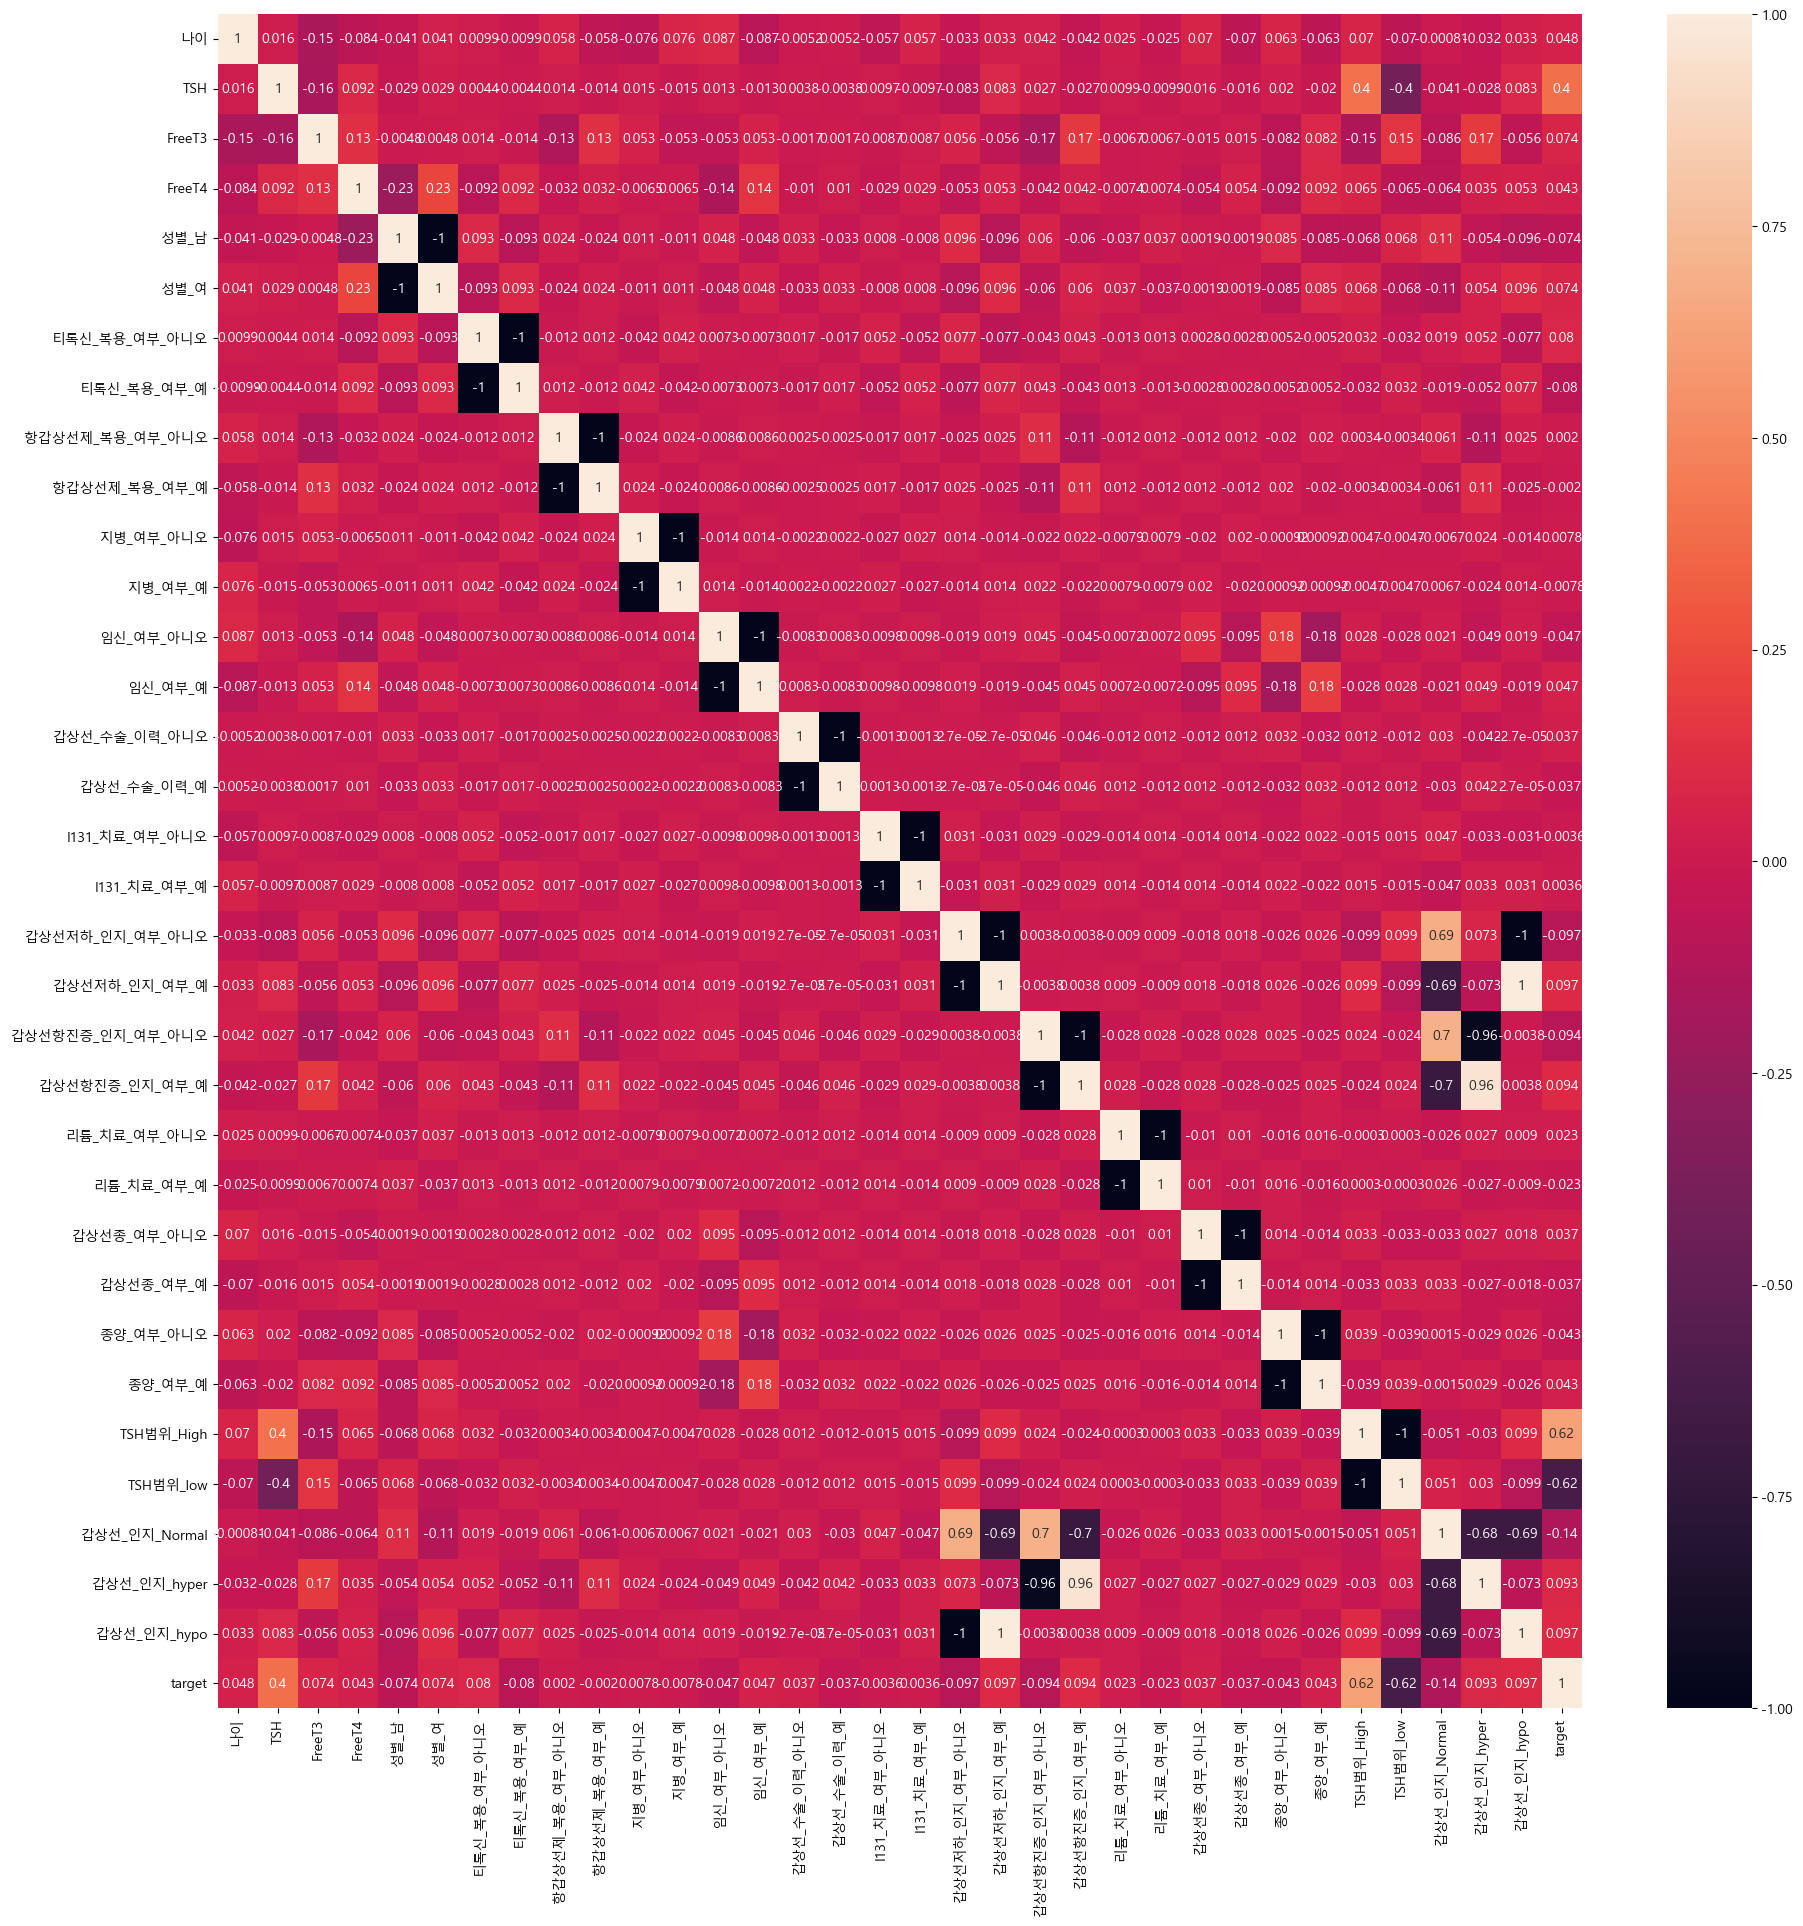

In [483]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(22,22))
sns.heatmap(df_heat.corr(),annot=True)
plt.show()

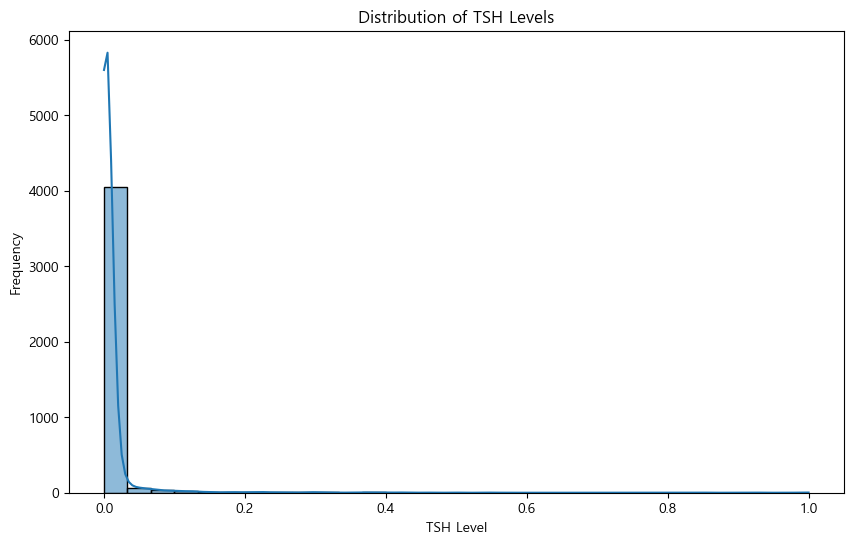

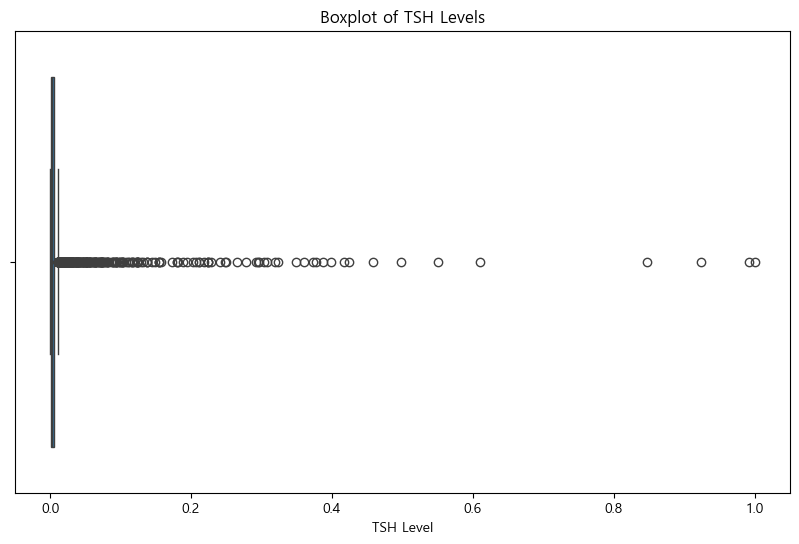

In [484]:
# TSH 값의 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(df_heat['TSH'], bins=30, kde=True)
plt.title('Distribution of TSH Levels')
plt.xlabel('TSH Level')
plt.ylabel('Frequency')
plt.show()

# TSH 값의 박스플롯
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_heat['TSH'])
plt.title('Boxplot of TSH Levels')
plt.xlabel('TSH Level')
plt.show()

In [485]:
x_train = x_train.drop(columns=['target'])
print(x_train.columns)

Index(['나이', 'TSH', 'FreeT3', 'FreeT4', '성별_남', '성별_여', '티록신_복용_여부_아니오',
       '티록신_복용_여부_예', '항갑상선제_복용_여부_아니오', '항갑상선제_복용_여부_예', '지병_여부_아니오',
       '지병_여부_예', '임신_여부_아니오', '임신_여부_예', '갑상선_수술_이력_아니오', '갑상선_수술_이력_예',
       'I131_치료_여부_아니오', 'I131_치료_여부_예', '갑상선저하_인지_여부_아니오', '갑상선저하_인지_여부_예',
       '갑상선항진증_인지_여부_아니오', '갑상선항진증_인지_여부_예', '리튬_치료_여부_아니오', '리튬_치료_여부_예',
       '갑상선종_여부_아니오', '갑상선종_여부_예', '종양_여부_아니오', '종양_여부_예', 'TSH범위_High',
       'TSH범위_low', '갑상선_인지_Normal', '갑상선_인지_hyper', '갑상선_인지_hypo'],
      dtype='object')


In [486]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv = KFold(n_splits=5,shuffle=True, random_state=42)

In [487]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(random_state=42,criterion='log_loss')
# scores = cross_val_score(model,x_train,y_train,cv = cv ,scoring='f1',n_jobs = -1)
# np.mean(scores)

In [498]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42,loss='exponential',
                                    n_estimators=200,
                                    learning_rate=0.05,
                                    max_depth=4,
                                    min_samples_split=5,
                                    min_samples_leaf=2,
                                    subsample=0.9,
                                    max_features='sqrt'
                                    )
scores = cross_val_score(model,x_train,y_train,cv = cv ,scoring='f1',n_jobs = -1)
np.mean(scores)

0.8786134152559368

In [489]:
# n_estimators=200,
# learning_rate=0.05,
# max_depth=5,
# min_samples_split=5,
# min_samples_leaf=2,
# subsample=0.9,
# max_features='sqrt'

In [499]:
model = GradientBoostingClassifier(random_state=42,loss='exponential',
                                    n_estimators=200,
                                    learning_rate=0.05,
                                    max_depth=4,
                                    min_samples_split=5,
                                    min_samples_leaf=2,
                                    subsample=0.9,
                                    max_features='sqrt'
                                    )
model.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, loss='exponential', max_depth=4,
                           max_features='sqrt', min_samples_leaf=2,
                           min_samples_split=5, n_estimators=150,
                           random_state=42, subsample=0.9)

In [491]:
pred = model.predict(x_test)
pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [492]:
for i in range(100):
    print(pred[20*(i):20*(i+1)])

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0]
[0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0

In [493]:
submit = pd.read_csv(f"{DATA_PATH}sample_submission.csv")
submit

,ID,target
0,test_0,NaN
1,test_1,NaN
2,test_2,NaN
3,test_3,NaN
4,test_4,NaN
...,...,...
3451,test_3451,NaN
3452,test_3452,NaN
3453,test_3453,NaN
3454,test_3454,NaN


In [494]:
submit["target"] = pred
submit

,ID,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0
...,...,...
3451,test_3451,0
3452,test_3452,0
3453,test_3453,1
3454,test_3454,0


In [495]:
submit.to_csv("submit_임태균_0622_2.csv",index=False)